Data preprocessing

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.cluster import KMeans

In [2]:
# read the dataset
data = pd.read_csv('dataset.csv',nrows=100000)

In [3]:
# delete unecessary columns. These data are not helpful to our research
data.drop('ID', axis=1, inplace=True)
data.drop("Description", axis=1, inplace=True)
data.drop("Number", axis=1, inplace=True)
data.drop("Zipcode", axis=1, inplace=True)
data.drop("Country", axis=1, inplace=True)
data.drop("Airport_Code", axis=1, inplace=True)
data.drop("Weather_Timestamp", axis=1, inplace=True)
data.drop("Pressure(in)", axis=1, inplace=True)
data.drop("Wind_Direction", axis=1, inplace=True)
data.drop("Wind_Speed(mph)", axis=1, inplace=True)
data.drop("Precipitation(in)", axis=1, inplace=True)
data.drop("Amenity", axis=1, inplace=True)
data.drop("Bump", axis=1, inplace=True)
data.drop("Crossing", axis=1, inplace=True)
data.drop("Give_Way", axis=1, inplace=True)
data.drop("Junction", axis=1, inplace=True)
data.drop("No_Exit", axis=1, inplace=True)
data.drop("Railway", axis=1, inplace=True)
data.drop("Roundabout", axis=1, inplace=True)
data.drop("Station", axis=1, inplace=True)
data.drop("Stop", axis=1, inplace=True)
data.drop("Traffic_Calming", axis=1, inplace=True)
data.drop("Traffic_Signal", axis=1, inplace=True)
data.drop("Turning_Loop", axis=1, inplace=True)
data.drop("Start_Time", axis=1, inplace=True)
data.drop("End_Time", axis=1, inplace=True)
data.drop("Start_Lat", axis=1, inplace=True)
data.drop("Start_Lng", axis=1, inplace=True)
data.drop("End_Lat", axis=1, inplace=True)
data.drop("End_Lng", axis=1, inplace=True)
data.drop("Wind_Chill(F)", axis=1, inplace=True)
data.drop("Street", axis=1, inplace=True)
data.drop("City", axis=1, inplace=True)
data.drop("County", axis=1, inplace=True)

In [4]:
# Delete missing values
# We will remove every row that has at least one missing value (NaN)
data.dropna(axis=0,inplace=True)

In [5]:
# Delete duplicate rows
data.drop_duplicates(inplace = True)

In [6]:
# reindex the dataframe after deletion of rows
data.reset_index(drop=True, inplace=True)

In [7]:
# select the last 4 columns from the dataset
last_4_columns  = data.iloc[: , -4:]

# convert each record of these columns. Night == 0 and Day == 1
last_4_columns["Sunrise_Sunset"] = np.where(last_4_columns["Sunrise_Sunset"] == "Night", 0, 1)
last_4_columns["Civil_Twilight"] = np.where(last_4_columns["Civil_Twilight"] == "Night", 0, 1)
last_4_columns["Nautical_Twilight"] = np.where(last_4_columns["Nautical_Twilight"] == "Night", 0, 1)
last_4_columns["Astronomical_Twilight"] = np.where(last_4_columns["Astronomical_Twilight"] == "Night", 0, 1)

# find the mean of each row of the last_4_columns dataframe
last_4_columns = last_4_columns.mean(axis=1)

# convert the values of the last_4_rows dataframe into 0 and 1, based in a condition
# if the mean of a row is <0,5, then the value of this row will be 0, else it will be 1
for i in range (len(last_4_columns)):
    if last_4_columns[i] < 0.5:
        last_4_columns[i] = 0
    else:
        last_4_columns[i] = 1

In [8]:
# convert R and L of column 'Side' to 0 and 1 respectively. That means that R is 0 and L is 1.
data["Side"] = np.where(data['Side'] == "R", 0, 1)

In [9]:
# delete the last 4 columns of the dataset
# we do not need them, as we can combine them in a new column
data.drop('Sunrise_Sunset', axis=1, inplace=True)
data.drop('Civil_Twilight', axis=1, inplace=True)
data.drop('Nautical_Twilight', axis=1, inplace=True)
data.drop('Astronomical_Twilight', axis=1, inplace=True)

In [10]:
# add a new column to the dataset.
# this new column will be the "last_4_columns" dataframe that we calculated earlier
data.insert(9,"Day_Night",last_4_columns)

In [11]:
# Converting Day_Night column from float to int
data = data.astype({"Day_Night": int})

In [12]:
# round all the values of "Temperature(F)" column
data["Temperature(F)"] = data["Temperature(F)"].round(0)

In [13]:
# delete outliers from the dataset using the IQR method.
# We will focus only in columns: Temperature(F), Distance(mi), Visibility(mi) and Humidity(%)
for x in ["Temperature(F)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

#---------------------------------------------------------------#

for x in ["Distance(mi)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

#---------------------------------------------------------------#

for x in ["Humidity(%)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

#---------------------------------------------------------------#

for x in ["Visibility(mi)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr) - 5 # In order to keep values other than 10 (Ex. 5.5,6,7,8,9,10)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [14]:
# Delete rows that contain nulls (outliers)
data.dropna(axis=0,inplace=True)

# reindex the dataframe after deletion of rows
data.reset_index(drop=True, inplace=True)

In [15]:
# Discretization of the column "Weather_Condition"

# we have separated all unique weather conditions of the dataset into four lists (very_bad_weahter, bad_weather,medium_weather and perfect_weather).
# This separation has been done according to our opinion.
very_bad_weather = ['Tornado','Smoke','Snow Grains','Shallow Fog','Thunderstorm','Light Thunderstorms and Rain','Thunder','Thunder in the Vicinity','Thunderstorms and Rain',
'Heavy Rain','Fog','Blowing Snow','Mist','T-Storm','T-Storm / Windy','Volcanic Ash','Heavy Thunderstorms and Rain','Thunder / Windy','Heavy T-Storm / Windy','Heavy T-Storm',
'Heavy Drizzle','Sand / Dust Whirlwinds','Blowing Snow Nearby','Heavy Rain / Windy','Sand / Dust Whirls Nearby']

bad_weather = ['Patches of Fog','Haze','Light Snow','Squalls','Light Ice Pellets','Widespread Dust','Blowing Dust / Windy',
'Light Snow / Windy','Light Snow Showers','Wintry Mix','Light Rain with Thunder', 'Haze / Windy','Dust Whirls','Light Snow and Sleet','Snow',
'Light Snow and Sleet / Windy','Light Sleet','Patches of Fog / Windy','Low Drifting Snow','Squalls / Windy','Wintry Mix / Windy','Sleet']

medium_weather = ['Light Rain','Overcast','Mostly Cloudy', 'Cloudy','Scattered Clouds','Drizzle','Light Drizzle','Light Freezing Drizzle','Rain','Fair / Windy','Light Freezing Rain','Cloudy / Windy','Partly Cloudy / Windy',
'Light Rain Showers','Light Rain / Windy','Mostly Cloudy / Windy','Blowing Dust','Funnel Cloud','Light Rain Shower','Smoke / Windy','Light Rain Shower / Windy','Rain Shower','Sand / Dust Whirlwinds / Windy','Rain Showers',
'Light Drizzle / Windy','Showers in the Vicinity','Widespread Dust / Windy','Light Freezing Rain / Windy''N/A Precipitation','Rain / Windy',
'Light Sleet / Windy','Hail','Drizzle / Windy','Light Haze']

perfect_weather = ['Clear','Fair','Partly Cloudy','Small Hail']

# change the values of the column "Weather_Condition" column
# Now, column "Weather_Condition" has only records: "Bad","Medium" and "Perfect"
for i in range(len(data["Weather_Condition"])):
    if data["Weather_Condition"][i] in bad_weather:
        data.at[i,"Weather_Condition"] = 2
    elif data["Weather_Condition"][i] in medium_weather:
        data.at[i,"Weather_Condition"] = 3  
    elif data["Weather_Condition"][i] in very_bad_weather:
         data.at[i,"Weather_Condition"] = 1
    else:
        data.at[i,"Weather_Condition"] = 4 # perfect weather

In [16]:
# Convert data type of column 'Weather_Condition' to int
data = data.astype({"Weather_Condition": int})

In [17]:
# Convert 'State' column of the dataframe into numbers ()
 
# instance of label Encoder
le = LabelEncoder()
 
# encode column 'State' and return encoded label
label = le.fit_transform(data['State'])

# insert new column to the dataset
data.insert(4,"State_Number",label)

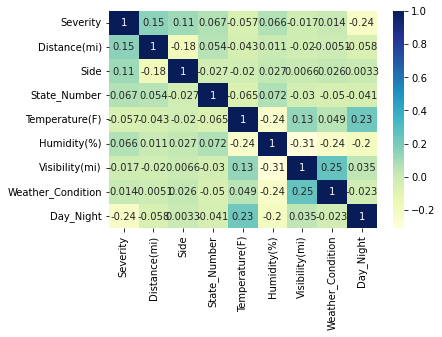

In [18]:
# show the correlation of data using Heatmap
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In the above Heatmap, we can conclude that ....

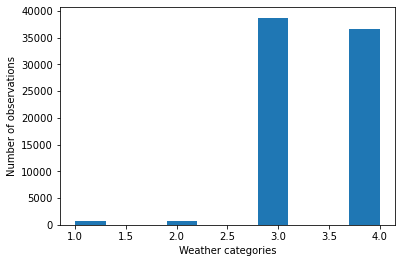

In [20]:
# Visualize 'Weather_Condition' column using histogram
plt.hist(data["Weather_Condition"])
plt.xlabel('Weather categories')
plt.ylabel('Number of observations')
plt.show()

In the Histogram above, we can conclude that (θα συμπληρωθεί όταν τρέξουμε τον κώδικα για ολόκληρο το dataset)

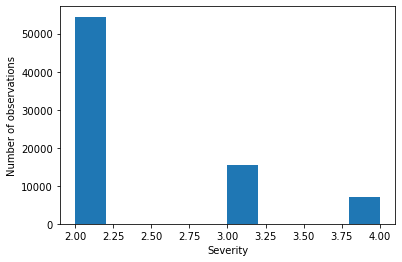

In [21]:
# Visualize 'Severity' column using histogram
plt.hist(data["Severity"])
plt.xlabel('Severity')
plt.ylabel('Number of observations')
plt.show()

In the Histogram above, we can conclude that (θα συμπληρωθεί όταν τρέξουμε τον κώδικα για ολόκληρο το dataset)

In [22]:
# print States, in which the majority of accidents has happened
n_accidents_per_state = data['State'].value_counts().head(10).rename_axis('State').reset_index(name='Counts')
n_accidents_per_state

,State,Counts
0,CA,9600
1,TX,8546
2,FL,8545
3,IL,6260
4,NY,5059
5,NC,4082
6,NJ,3008
7,MO,2650
8,GA,2647
9,MI,2564


Καταλαβαίνουμε ότι η πολιτεία με τα περισσότερα τροχαία είναι η:

Clustering using K-Means

Let's find our more information that are hidden inside the dataset.

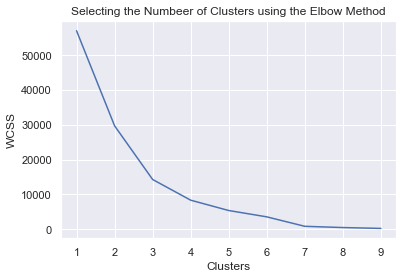

In [23]:
############################################################
# CLUSTER DATASET BASED ON Severity AND Weather Condition  #
############################################################

#  we will run an algorithm (Elbow Method) in order to find the optimum K for our dataset
X = data[['Severity', 'Weather_Condition']].copy()

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 10), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()


Optimum K is 

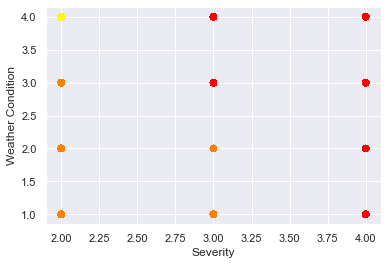

In [24]:
# K-means implementation and visualization of the effect
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(X)

plt.scatter(X['Severity'], X['Weather_Condition'],c=y,cmap="autumn")
plt.xlabel('Severity')
plt.ylabel('Weather Condition')
plt.show()

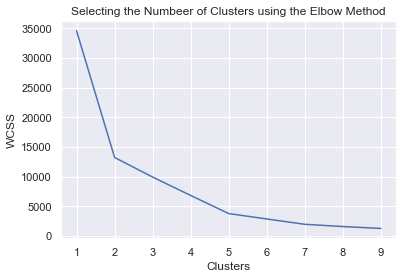

In [25]:
############################################################
# CLUSTER DATASET BASED ON Weather_Condition AND Distance  #
############################################################

#  we will run an algorithm (Elbow Method) in order to find the optimum K for our dataset
Y = data[['Weather_Condition', 'Distance(mi)']].copy()

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 10), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum K is

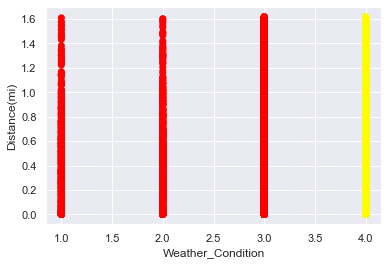

In [26]:
kmeans = KMeans(n_clusters=2)
y = kmeans.fit_predict(Y)

plt.scatter(Y['Weather_Condition'], Y['Distance(mi)'],c=y,cmap='autumn')
plt.xlabel('Weather_Condition')
plt.ylabel('Distance(mi)')
plt.show()

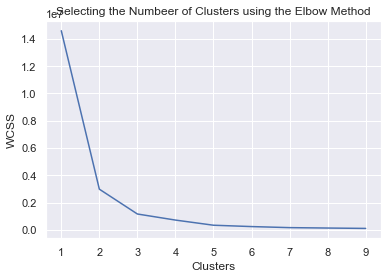

In [27]:
############################################################
# CLUSTER DATASET BASED ON Severity AND State              #
############################################################

#  we will run an algorithm (Elbow Method) in order to find the optimum K for our dataset
H = data[['Severity', 'State_Number']].copy()

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(H)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 10), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum K is 3

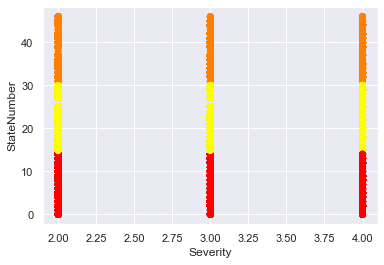

In [28]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(H)

plt.scatter(H['Severity'], H['State_Number'],c=y,cmap="autumn")
plt.xlabel('Severity')
plt.ylabel('StateNumber')
plt.show()

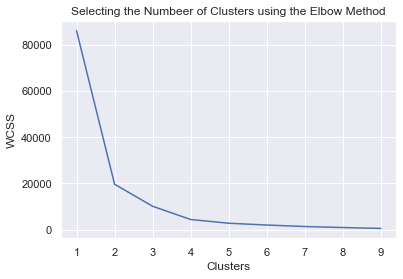

In [29]:
############################################################
# CLUSTER DATASET BASED ON Day_Night AND Visibility(mi)    #
############################################################

#  we will run an algorithm (Elbow Method) in order to find the optimum K for our dataset
D = data[['Day_Night', 'Visibility(mi)']].copy()

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(D)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 10), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum K is 

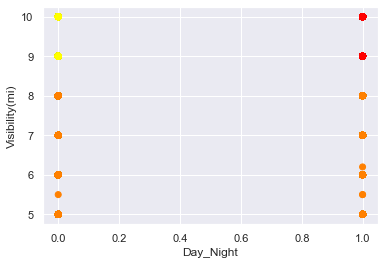

In [30]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(D)

plt.scatter(D['Day_Night'], D['Visibility(mi)'],c=y,cmap="autumn")
plt.xlabel('Day_Night')
plt.ylabel('Visibility(mi)')
plt.show()

C:\Users\strat\AppData\Local\Temp\ipykernel_5816\1841313490.py:11: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(S)
C:\Users\strat\AppData\Local\Temp\ipykernel_5816\1841313490.py:11: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(S)
C:\Users\strat\AppData\Local\Temp\ipykernel_5816\1841313490.py:11: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(S)


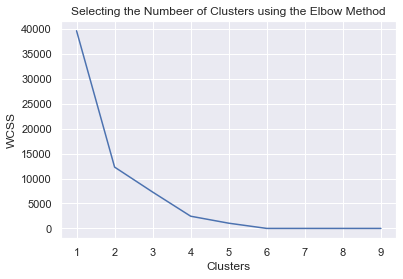

In [31]:
############################################################
# CLUSTER DATASET BASED ON Side and Severity               #
############################################################

#  we will run an algorithm (Elbow Method) in order to find the optimum K for our dataset
S = data[['Side', 'Severity']].copy()

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(S)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 10), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum K is

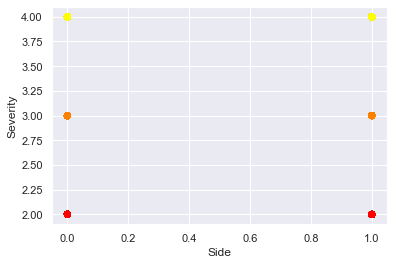

In [32]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(S)

plt.scatter(S['Side'], S['Severity'],c=y,cmap="autumn")
plt.xlabel('Side')
plt.ylabel('Severity')
plt.show()

In [33]:
# Split the datase into <Feature(s)> and <Label(s)>
# Features: Weather_Condition, Visibility(mi), Day_Night
# Labels: Severity

# X is the <Features> matrix
X = data[['Weather_Condition', 'Visibility(mi)','Day_Night']].copy()
y = data['Severity'].copy()

In [34]:
# Split dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
# Normalize the X_train and X_test, in order for them to be between [0,1]  
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

First classifying method - Gaussian Classifier

In [36]:
# Use Bayes classifier in order to classify our Features and Labels
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# predict the test results
y_pred  =  classifier.predict(X_test)

In [37]:
# Calculate the Confusion Matrix - Bases Classifier
cm = confusion_matrix(y_test, y_pred)

# Calculate accurancy score - Bayes Classifier
ac = accuracy_score(y_test,y_pred)

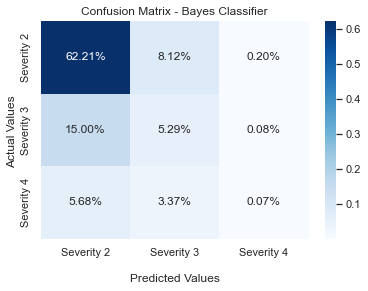

In [38]:
# Plot confusion matrix using a heatmap
ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Bayes Classifier');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Severity 2','Severity 3','Severity 4'])
ax.yaxis.set_ticklabels(['Severity 2','Severity 3','Severity 4'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [39]:
# Print accurancy score of Bayes Classifier
ac

0.6756492872485843